Подключение библиотек и скриптов

In [91]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
matplotlib.rcParams.update({'font.size': 14})

Путь к директориям и файлам

In [94]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [95]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [96]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [97]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [98]:
print(train_df.shape[0])
print(test_df.shape[0])

10000
5000


In [99]:
train_df.shape[1] - 1 == test_df.shape[1]

True

Приведение типов данных

In [100]:
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [101]:
train_df = train_df.convert_dtypes()
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  Int64  
 1   DistrictId     10000 non-null  Int64  
 2   Rooms          10000 non-null  Int64  
 3   Square         10000 non-null  Float64
 4   LifeSquare     7887 non-null   Float64
 5   KitchenSquare  10000 non-null  Int64  
 6   Floor          10000 non-null  Int64  
 7   HouseFloor     10000 non-null  Int64  
 8   HouseYear      10000 non-null  Int64  
 9   Ecology_1      10000 non-null  Float64
 10  Ecology_2      10000 non-null  string 
 11  Ecology_3      10000 non-null  string 
 12  Social_1       10000 non-null  Int64  
 13  Social_2       10000 non-null  Int64  
 14  Social_3       10000 non-null  Int64  
 15  Healthcare_1   5202 non-null   Int64  
 16  Helthcare_2    10000 non-null  Int64  
 17  Shops_1        10000 non-null  Int64  
 18  Shops_2

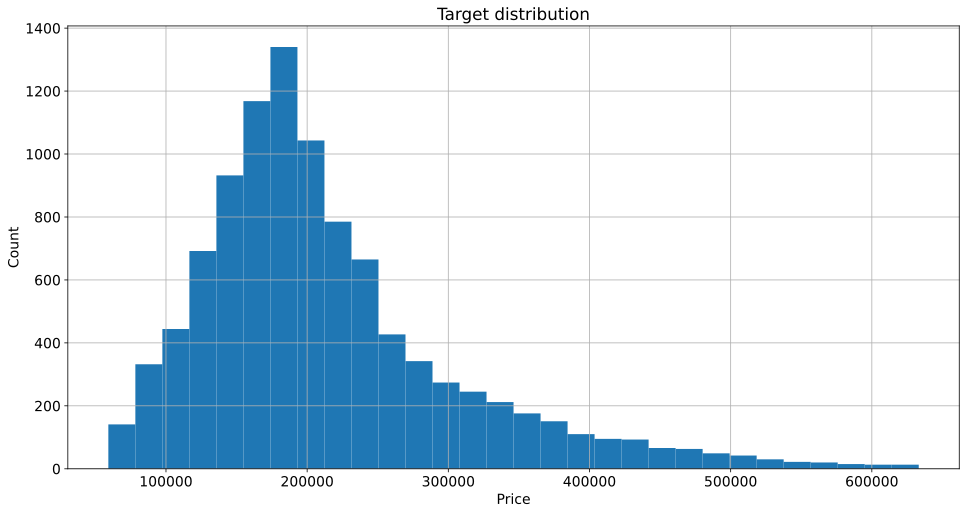

In [102]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

In [103]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['Id'].dtype

test_df['Id'] = train_df['Id'].astype(str)
test_df['Id'].dtype

dtype('O')

In [104]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df['DistrictId'].dtype

test_df['DistrictId'] = test_df['DistrictId'].astype(str)
test_df['DistrictId'].dtype

dtype('O')

In [105]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01
Social_2,10000.0,5352.157400,4006.799803,168.000000,1564.000000,5285.000000,7227.000000,1.908300e+04


In [106]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867
Social_1,5000.0,24.933800,17.532202,0.000000,6.000000,25.000000,36.000000,74.000000
Social_2,5000.0,5406.900000,4026.614773,168.000000,1564.000000,5285.000000,7287.000000,19083.000000


Заменим на 0 'LifeSquare

In [107]:
print(train_df['LifeSquare'].isnull().sum())
print(test_df['LifeSquare'].isnull().sum())

train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = 0
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = 0

print(train_df['LifeSquare'].isnull().sum())
print(test_df['LifeSquare'].isnull().sum())

2113
1041
0
0


Проверим в тестовых данных показатели больше max 'Square' , 'LifeSquare', 'KitchenSquare', , то есть сколько объектов с большей площадью в тренировочных данных.

In [108]:
print('--- Square ---')
print(train_df.loc[train_df['Square'] > 223.5,  'Square'])
print()
print('--- LifeSquare ---')
print(train_df.loc[train_df['LifeSquare'] > 303.5,  'LifeSquare'])
print()
print('--- LifeSquare ---')
print(train_df.loc[train_df['KitchenSquare'] > 620,  'KitchenSquare'])

--- Square ---
726     604.705972
1906    275.645284
7010    409.425181
9229    641.065193
Name: Square, dtype: Float64

--- LifeSquare ---
5183     461.463614
7010     410.639749
8000    7480.592129
9229     638.163193
Name: LifeSquare, dtype: Float64

--- LifeSquare ---
6505    1970
9520    2014
Name: KitchenSquare, dtype: Int64


In [109]:
train_df = train_df.loc[train_df['Square'] <= 223.5]
train_df = train_df.loc[train_df['LifeSquare'] <= 303.5]
train_df = train_df.loc[train_df['KitchenSquare'] <= 620]
train_df.index.size

9992

In [110]:
print('--- HouseYear ---')
print(train_df.loc[train_df['HouseYear'] > 2020,  'HouseYear'])

--- HouseYear ---
8828        4968
9163    20052011
Name: HouseYear, dtype: Int64


In [111]:
train_df.loc[train_df['HouseYear'] == 20052011, 'HouseYear'] = 2005
train_df.loc[train_df['HouseYear'] == 4968, 'HouseYear'] = 1968

In [112]:
train_df['Rooms'].value_counts()

2     3878
1     3702
3     2233
4      150
5       17
0        8
10       2
19       1
6        1
Name: Rooms, dtype: Int64

заменим медианой

In [113]:
train_df.loc[train_df['Rooms'].isin([0, 5, 6, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

In [114]:
train_df.loc[train_df['HouseFloor'] > 99, 'HouseFloor'] = train_df['Floor']

In [115]:
print(train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index.size)

1822


In [116]:
print(test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index.size)

884


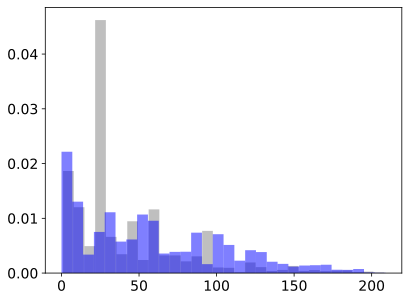

In [117]:
HC_Null = train_df.loc[train_df['Healthcare_1'].isnull(), ['DistrictId']].astype('int64')
HC_Fill = train_df.loc[train_df['Healthcare_1'].notnull(), ['DistrictId']].astype('int64')

plt.hist(HC_Null['DistrictId'].to_numpy(), bins=30, density=True, alpha=0.5, label='NULL', color='grey')
plt.hist(HC_Fill['DistrictId'].to_numpy(), bins=30, density=True, alpha=0.5, label='Not NULL', color='blue')

plt.show()

In [118]:
train_df['Healthcare_1'].value_counts()

540     511
30      347
1046    244
750     163
229     148
       ... 
370      14
32       12
1815     10
35        2
0         1
Name: Healthcare_1, Length: 79, dtype: Int64

In [119]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = 0
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = 0

In [120]:
train_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9992 non-null   object 
 1   DistrictId     9992 non-null   object 
 2   Rooms          9992 non-null   Int64  
 3   Square         9992 non-null   Float64
 4   LifeSquare     9992 non-null   Float64
 5   KitchenSquare  9992 non-null   Int64  
 6   Floor          9992 non-null   Int64  
 7   HouseFloor     9992 non-null   Int64  
 8   HouseYear      9992 non-null   Int64  
 9   Ecology_1      9992 non-null   Float64
 10  Ecology_2      9992 non-null   string 
 11  Ecology_3      9992 non-null   string 
 12  Social_1       9992 non-null   Int64  
 13  Social_2       9992 non-null   Int64  
 14  Social_3       9992 non-null   Int64  
 15  Healthcare_1   9992 non-null   Int64  
 16  Helthcare_2    9992 non-null   Int64  
 17  Shops_1        9992 non-null   Int64  
 18  Shops_2 

Генерация новых фич

<AxesSubplot:>

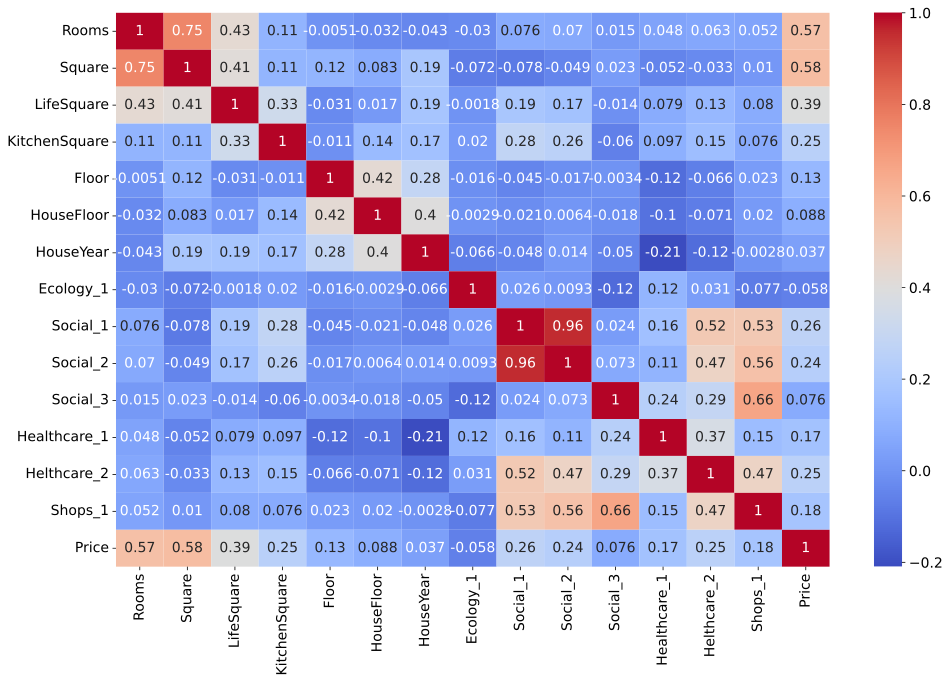

In [121]:
corrmat = train_df.corr()
plt.subplots(figsize=(16, 10))
sns.heatmap(corrmat, cmap='coolwarm', annot = True)

<AxesSubplot:>

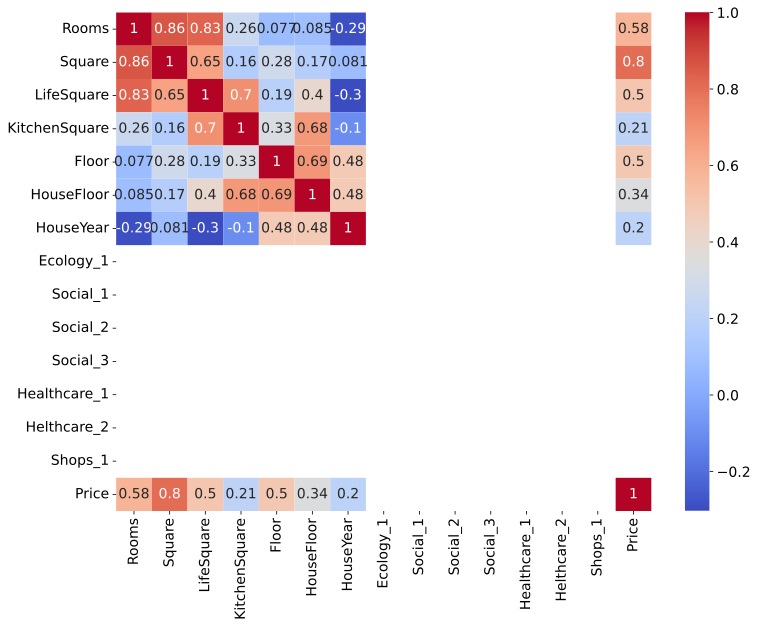

In [122]:
df_35 = train_df.loc[train_df['DistrictId']=='35']
df_35.head()

corrmat_35 = df_35.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_35, cmap='coolwarm', annot = True)

In [123]:
gp1 = train_df.groupby(['DistrictId'])['Square'].sum()
gp2 = train_df.groupby(['DistrictId'])['Price'].sum()
gp3 = gp2 / gp1

train_df['PriceForMetr'] = train_df['DistrictId'].map(gp3.to_dict())
test_df['PriceForMetr'] = test_df['DistrictId'].map(gp3.to_dict())

test_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [124]:
test_df.loc[test_df['PriceForMetr'].isnull(), 'PriceForMetr'] = train_df['PriceForMetr'].median()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

Преобразование в бинарные признаки

In [125]:
for cat_colname in ['Ecology_2', 'Ecology_3', 'Shops_2']:
    print(str(cat_colname) + ' in train \n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')
    print(str(cat_colname) + ' in test \n\n' + str(test_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2 in train 

B    9895
A      97
Name: Ecology_2, dtype: Int64
****************************************************************************************************

Ecology_2 in test 

B    4952
A      48
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3 in train 

B    9718
A     274
Name: Ecology_3, dtype: Int64
****************************************************************************************************

Ecology_3 in test 

B    4851
A     149
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2 in train 

B    9168
A     824
Name: Shops_2, dtype: Int64
****************************************************************************************************

Shops_2 in test 

B    4588
A     412
Name: Shops_2, dtype: int64
***************************************************************************

In [126]:
def model_test_procedure(model, name, X_part, y_part, s_color='blue'):
    """
    # Функция применяет модель к заданным данным и проверяет отклонение от целевых значений.
    
    # Параметры:
    1) model - обученная модель;
    2) name - заголовок на выводимом графике
    3) X_part - данные к которым будет применена модель
    4) y_part - правильные целевые значения.
    5) s_color - цветовая схема графика.
    

    # Процедура должна рассчитать среднее квадратичное отклонение и построить график.

    """
    model_pred = model.predict(X_part)
    r2 = r2_score(y_part, model_pred)
    mse = mean_squared_error(y_part, model_pred)
    plt.scatter(y_part, (model_pred - y_part), color=s_color)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.title(name)
    plt.legend([f'R2= {r2:.4f} and mse= {mse:.0e}'])
    plt.axhline(0, color='red')
    plt.show()

Построение модели

In [127]:
features = train_df.select_dtypes(exclude=['object', 'string', 'category']).columns.tolist()
features.remove('Price')
print(features)

target = 'Price'

['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'PriceForMetr']


In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df[features], train_df[target], test_size=0.3, random_state=42)

In [129]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6994 entries, 3174 to 7275
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6994 non-null   Int64  
 1   Square         6994 non-null   Float64
 2   LifeSquare     6994 non-null   Float64
 3   KitchenSquare  6994 non-null   Int64  
 4   Floor          6994 non-null   Int64  
 5   HouseFloor     6994 non-null   Int64  
 6   HouseYear      6994 non-null   Int64  
 7   Ecology_1      6994 non-null   Float64
 8   Social_1       6994 non-null   Int64  
 9   Social_2       6994 non-null   Int64  
 10  Social_3       6994 non-null   Int64  
 11  Healthcare_1   6994 non-null   Int64  
 12  Helthcare_2    6994 non-null   Int64  
 13  Shops_1        6994 non-null   Int64  
 14  PriceForMetr   6994 non-null   float64
dtypes: Float64(3), Int64(11), float64(1)
memory usage: 969.9 KB


In [130]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 4026 to 409
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          2998 non-null   Int64  
 1   Square         2998 non-null   Float64
 2   LifeSquare     2998 non-null   Float64
 3   KitchenSquare  2998 non-null   Int64  
 4   Floor          2998 non-null   Int64  
 5   HouseFloor     2998 non-null   Int64  
 6   HouseYear      2998 non-null   Int64  
 7   Ecology_1      2998 non-null   Float64
 8   Social_1       2998 non-null   Int64  
 9   Social_2       2998 non-null   Int64  
 10  Social_3       2998 non-null   Int64  
 11  Healthcare_1   2998 non-null   Int64  
 12  Helthcare_2    2998 non-null   Int64  
 13  Shops_1        2998 non-null   Int64  
 14  PriceForMetr   2998 non-null   float64
dtypes: Float64(3), Int64(11), float64(1)
memory usage: 415.7 KB


In [131]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

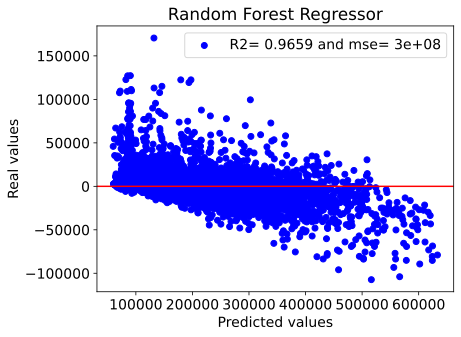

In [132]:
model_test_procedure(rf_model, 'Random Forest Regressor', X_train, y_train)

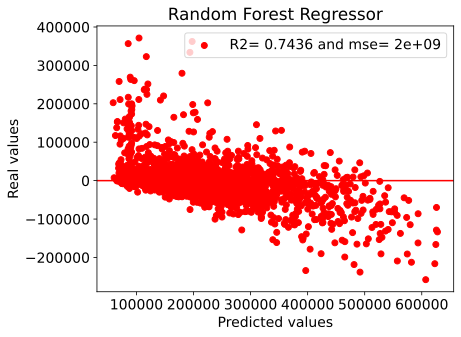

In [133]:
model_test_procedure(rf_model, 'Random Forest Regressor', X_test, y_test, 'red')

In [134]:
cv_score = cross_val_score(
    rf_model,
    train_df[features],
    train_df[target],
    scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=1)
)
cv_score

array([0.75631624, 0.76839836, 0.7735719 , 0.70107202, 0.76384191])

для оценки квартир из test_df  используется модель Random Forest Regressor, так как она дала наилучший результат

In [135]:
features

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'PriceForMetr']

In [136]:
best_model = RandomForestRegressor()
best_model.fit(train_df[features], train_df[target])

RandomForestRegressor()

In [137]:
test_df['Price'] = best_model.predict(test_df[features])

In [138]:
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,PriceForMetr,Price
0,11809,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,...,B,24,4378,0,1036.0,1,1,B,4528.685165,160907.150942
1,3013,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,...,B,2,629,1,0.0,0,0,A,2677.872755,113509.195152
2,8215,27,2.0,59.463678,0.000000,9.0,19,19.0,1977,0.211401,...,B,9,1892,0,0.0,0,1,B,2715.796729,144968.430650
3,2352,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,...,B,2,475,0,0.0,0,0,B,2239.484158,111227.572620
4,13866,74,1.0,53.837056,0.000000,1.0,8,17.0,1977,0.309479,...,B,35,7715,4,990.0,0,6,B,3272.322491,174516.370819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9458,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,...,B,31,6119,4,0.0,1,2,B,4050.683932,172735.275651
4996,16538,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,...,B,15,2787,2,520.0,0,7,B,4615.084505,401910.637483
4997,4087,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,...,B,28,6533,1,1015.0,2,5,B,4052.919766,149313.414097
4998,3519,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,...,B,33,7976,5,0.0,0,11,B,4326.924682,189423.775079


In [139]:
test_df[['Id', 'Price']].to_csv('MGasilin_predictions.csv', index=None)